# Surfaces
Surfaces are used to record data from a field data model. In theory, a field is a continuous surface and thus has an infinite number of locations at which it could be measured. 

To explore how Python represents surfaces, we will use an extract for the Brazilian city of Sao Paulo of a global population dataset. This dataset records population counts in cells of the same dimensions uniformly covering the surface of the Earth. 

Our extract is available as a GeoTIF file, a variation of the TIF image format that includes geographic information. 

We can use the open_rasterio() method from the rioxarray package to read in the GeoTIF

In [4]:
import rioxarray

In [6]:
pop = rioxarray.open_rasterio('ghsl_sao_paulo.tif')
type(pop)

xarray.core.dataarray.DataArray

- xarray is a package to work with multi-dimensional labeled arrays. 
- We can use arrays of not only two dimensions as in a table with rows and columns, but also with an arbitrary number of them
- Each of these dimensions is "tracked" by an index that makes it easy and efficient to manipulate.
- In xarrat, these inices are called coordinates, ande they can be retrived from our DataArray through the coords attribute.

In [7]:
pop.coords

Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -4.482e+06 -4.482e+06 ... -4.365e+06 -4.365e+06
  * y            (y) float64 -2.822e+06 -2.822e+06 ... -2.926e+06 -2.926e+06
    spatial_ref  int64 0

- Interestingly, our surface has three dimensions: x,y and band.
- An xarray.DataArray object contains additional information about the values stored under the attrs attribute:

In [12]:
pop.attrs

{'AREA_OR_POINT': 'Area',
 '_FillValue': -200.0,
 'scale_factor': 1.0,
 'add_offset': 0.0}

Thus, our DataArray has three dimensions

In [9]:
pop.shape

(1, 416, 468)

A common operation will be to reduce this to only the two geographic ones. We can do this with sel operator, which allows us to select data by the value of theri coordinates

In [10]:
pop.sel(band=1)

<xarray.DataArray (y: 416, x: 468)>
[194688 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 -4.482e+06 -4.482e+06 ... -4.365e+06 -4.365e+06
  * y            (y) float64 -2.822e+06 -2.822e+06 ... -2.926e+06 -2.926e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     -200.0
    scale_factor:   1.0
    add_offset:     0.0

The resulting object is thus a two-dimensional array. Similar to geographic tables, we can quickly plot the values in our dataset.

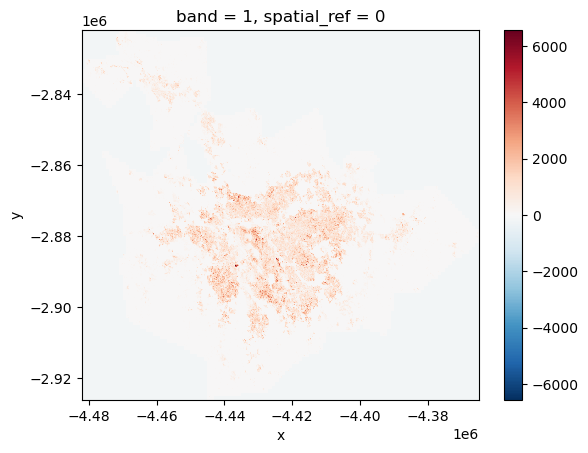

In [11]:
pop.sel(band=1).plot();

- This gives us a first overview of the distribution of population uin the Sao Paulo region. 
- However, if we inspect the map further, we can see that the map includes negative counts.
- With that in mind, we can use the where() method to select only values that are not -200:

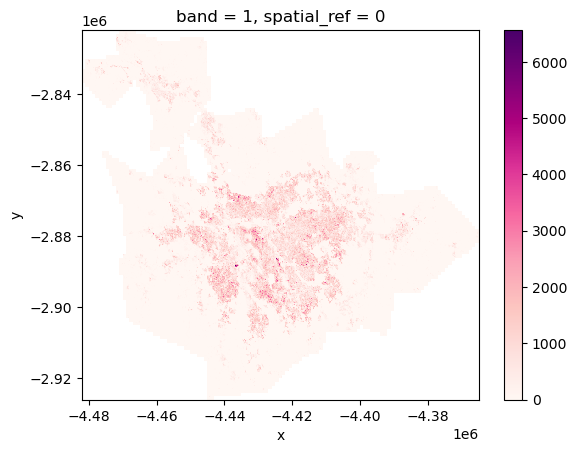

In [13]:
pop.where(pop != -200).sel(band=1).plot(cmap="RdPu")

The colorbar now looks more sensible, and indicates real counts, rather than including the missing data placeholder values.